# Decision Tree Algoritması

- Karar ağaçları (Decision Tree) algoritması, supervised learningde (denetimli öğrenmede), tree based (ağaç bazlı) öğrenme algoritmalarından birisidir. Bu algoritma Random Forest adını verdiğimiz algoritmanın da temelini oluşturmaktadır. 
- Sınıflama, özellik ve hedefe göre karar düğümleri (decision nodes) ve yaprak düğümlerinden (leaf nodes) oluşan ağaç yapısı formunda bir model oluşturan bir sınıflandırma yöntemidir. 
- **Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar verme adımları uygulanarak, büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına bölerek kullanılan bir yapıdır.**

Aşağıdaki görseli inceleyelim ve yorumlayalım;

- Basit bir algoritma ile başlayalım. Hava durumunda göre dışarıda oyun oynayabilir miyiz sorusunu cevaplayan ve Karar Ağaçları algoritması ile oluşturulmuş bir görsel görmekteyiz.

- Toplamda 22 örnek bulunmakta bu 22 örneğin 13'ü oyna 9'u ise oynama olarak sonuçlandırılmıştır.

1. Eğer havanın güneşli olma durumuna bakarsak, 6 oyna ve 6 oynama şeklinde bir sınıflandırma söz konusu. Nem oranının %70'e eşit veya düşük olma durumunda 5 oyna 3 oynama verisi için 5 / 8 yani %62.5 doğruluk, %70'den büyük olma durumunda ise 1 oyna 3 oynama verisi için 3 / 4 yani %75 doğruluk söz konusudur.

2. Havanın kapalı olma durumunda ise %80 olasılıkla Play tahmini verilmiştir.

3. Yağmurlu olma durumunda ise 5 örnek (3 play, 2 don't play) bulunmakta. Rüzgarın True olduğu koşulda tahmin 2 Don't Play tahmini %100 doğrulukla cevaplanırken, rüzgarın False olduğu durumda ise 3 Play ile %100 doğruluk ile tahmin edilmiştir

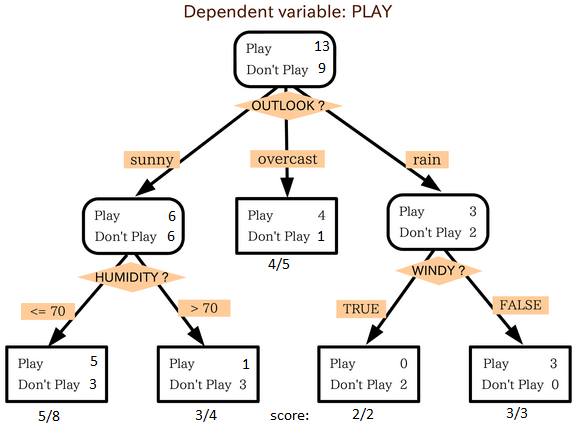

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv("audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [51]:
df.isnull().sum()
# Null olarak görünen bir değer yok, bu durumda fill ya da drop yapmaya gerek yok

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [52]:
# Model string bir değer içeriyor, bunları sayısal bir değere çevirelim

la = LabelEncoder()
df['model'] = la.fit_transform(df['model'])
df['transmission'] = la.fit_transform(df['transmission'])
df['fuelType'] = la.fit_transform(df['fuelType'])

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [53]:
X = df.drop(columns=['price'])
y = df['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = DecisionTreeRegressor(max_depth=8, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [56]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 2115.6803952985765
MSE: 9721042.38144646
RMSE: 3117.858621144721
R2: 0.9356773995412074


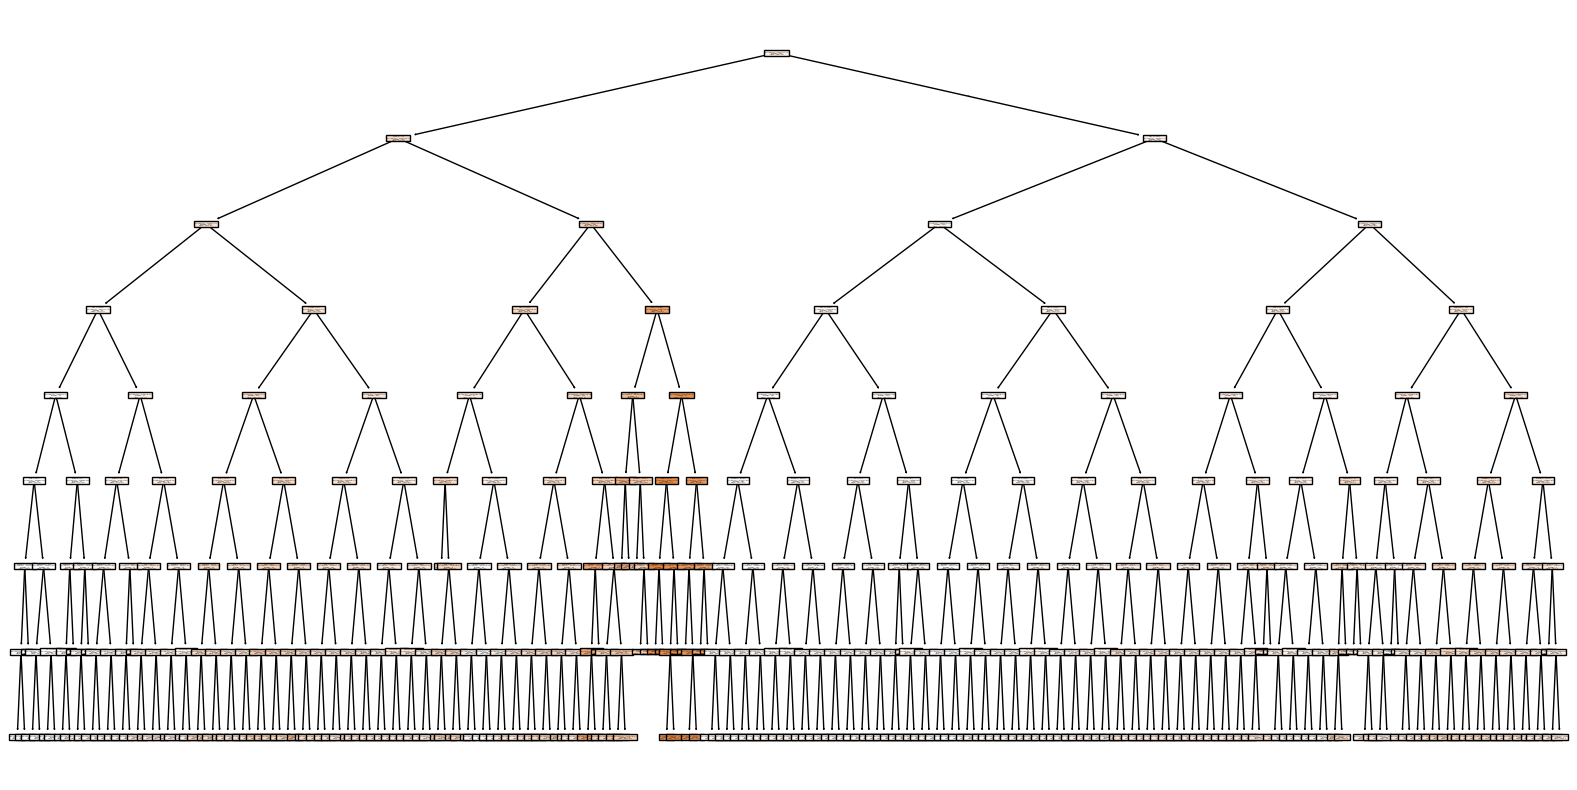

In [57]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [63]:
data = np.array([
    [3, 2020, 0, 30000, 0, 20, 64.2, 2.0]
])
pred = model.predict(data)
print(f"Predicted price: {pred[0]}")

Predicted price: 22925.108695652172


/opt/anaconda3/envs/python_a/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
